In [5]:
import pandas as pd
import pathlib
import numpy as np

%matplotlib inline

base = pathlib.Path() / "data" / "parsed"

mods_file = base / "mods.csv"
mods = pd.read_csv(mods_file, index_col="id")

tags_file = base / "tags.csv"
tags = pd.read_csv(tags_file, index_col="tag_id")
mod_tag_file = base / "tag_mod.csv"
mod_tag = pd.read_csv(mod_tag_file)
mod_tag = pd.merge(mod_tag, tags, on="tag_id")
mods_with_tags = pd.merge(mods, mod_tag, left_on="id", right_on="mod_id")

# Razporeditov ogledov

array([[<AxesSubplot:title={'center':'views'}>]], dtype=object)

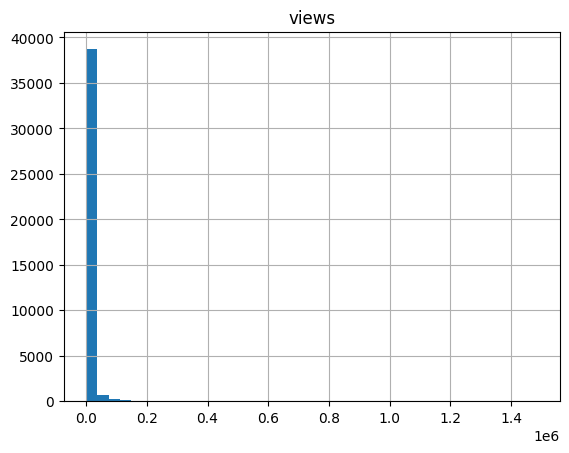

In [6]:
mods[["views"]].hist(bins=40)

array([[<AxesSubplot:title={'center':'views'}>]], dtype=object)

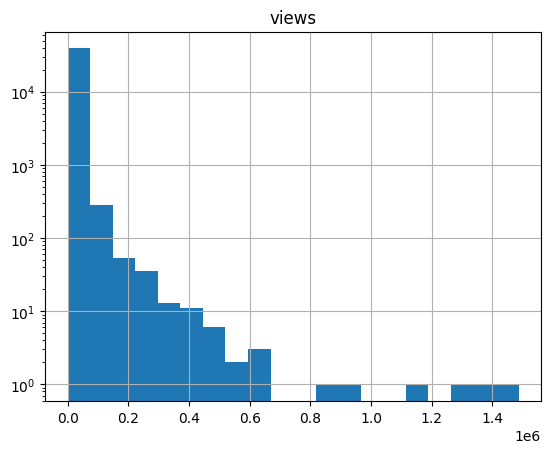

In [7]:
mods[["views"]].hist(log=True, bins=20)

0.68% mod-ov ima manj kot 1 ogledov.
6.42% mod-ov ima manj kot 10 ogledov.
30.04% mod-ov ima manj kot 100 ogledov.
53.11% mod-ov ima manj kot 500 ogledov.


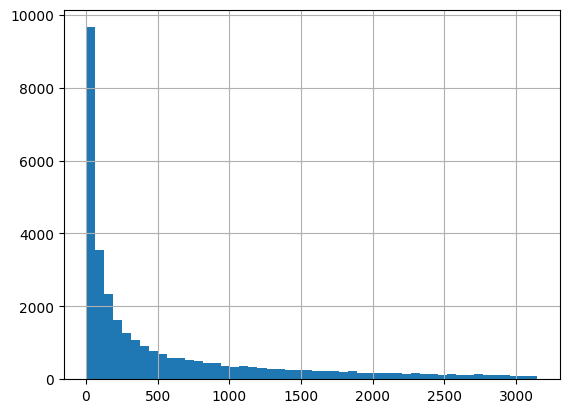

In [8]:
STEVILO_VSEH = len(mods)
def delez_ki_ima_manj_kot(ogledov: int) -> float:
    global STEVILO_VSEH
    malo_ogledov = len(mods[mods["views"] <= ogledov]) / STEVILO_VSEH
    print(f"{round(malo_ogledov * 100, 2)}% mod-ov ima manj kot {ogledov} ogledov.")

malo_ogledani = mods.sort_values(by="views").head(round(len(mods) * 0.8))
malo_ogledani["views"].hist(bins=50)

delez_ki_ima_manj_kot(1)
delez_ki_ima_manj_kot(10)
delez_ki_ima_manj_kot(100)
delez_ki_ima_manj_kot(500)

> Zaradi oblike strani ki ponuja mod-e ( najprej pokaže novejše popularne mod-e, manjbolj popularni so en klik stran ) bo razdelitev obiskovalcih enakomerna.

Iz zgornjih treh grafov se vidi, da to sploh ni res. Če y skala ni logaritemska se stolpcev razen prvega sploh ne vidi. Velika večina mod-ov ima torej zelo malo ogledov, polovica jih ima manj kot 500, medtem ko imajo največji več kot milijon.


# Velikosti mod-ov, št. modov z velikostjo 0

In [9]:
sizes = mods[["size"]]
small_mods = sizes[sizes["size"] < 10_000]

In [10]:
# tu so automatsko narejeni indeksi ok, ker i-to število pomeni
# število modov velikosti i
sizes_amounts = pd.DataFrame(np.bincount(small_mods["size"]), columns=("amount",))

<AxesSubplot:>

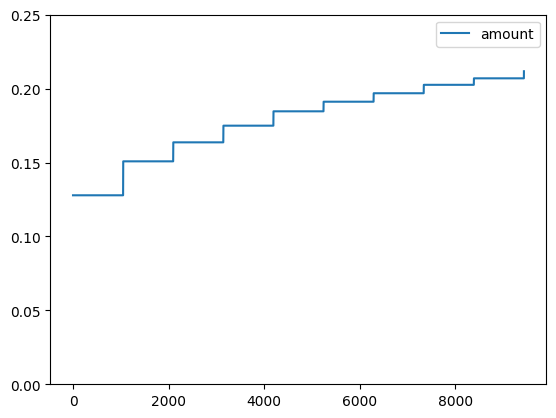

In [11]:
# kumulativen delež modov manjših od
(sizes_amounts / len(mods)).cumsum().plot(ylim=(0, 0.25))

In [12]:
mods[mods["size"] <= 2000].groupby("size").size()

size
0       5093
1049     915
dtype: int64

> Zelo lahko je naložiti prazen mod, tak ki nima nobenih datotek in nič ne spremeni. 5% - 10% procentov modov bo praznih.

Iz grafa zgoraj se vidi, da je res praznih že pri velikosti 0 kar 13% modov. Graf ima skoke, ker steam zaokroži velikost, prvi skok je npr. pri 1049 bajtih, kjer Steam pokaže `0.001 MB`.

# Razmerje med velikostjo in številom uporabnikov

<AxesSubplot:xlabel='downloads', ylabel='size'>

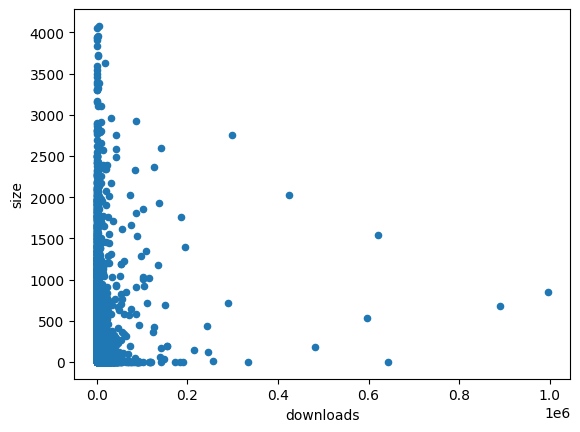

In [13]:
mods_size_mb = mods.copy()
mods_size_mb["size"] = mods_size_mb["size"] / (2**20) # pretvori v MiB
mods_size_mb.plot.scatter("downloads", "size")

<AxesSubplot:xlabel='likes', ylabel='size'>

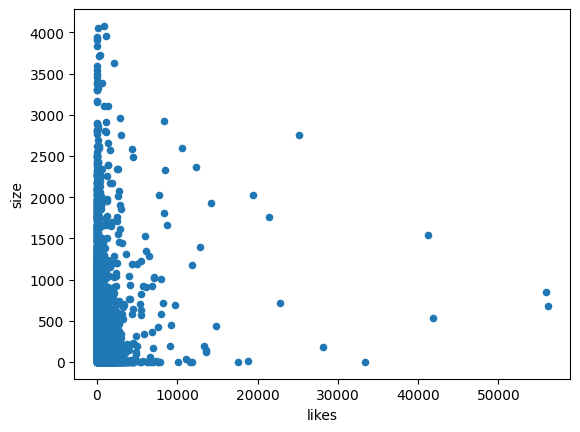

In [14]:
mods_size_mb.plot.scatter("likes", "size")

In [15]:
mods[(mods["size"] > 3500 * 2 ** 20)]

,title,views,downloads,likes,rating,number_of_ratings,size
id,,,,,,,
1913418927,Better National Focuses (DEAD),49219,4125,816,5.0,509,4276460978
2261848200,Shurai Empire - HOI4 Isekai,3328,363,113,4.0,51,4255204246
2540811400,Touhou Doujin Circle: Tamaonsen,361,47,19,NaN,0,4117505245
2288665785,HOI4: Nerves of Steel (ALPHA),52605,3317,1133,5.0,420,4148964622
2742404881,Basic Focus Tree,1852,63,15,NaN,0,3721418244
2221794612,Kaiserredux-State Transfer Tool Compatability ...,12249,1909,212,4.0,82,3888652485
2533931916,Touhou Doujin Circle: Halozy,242,51,12,NaN,0,4017152328
2579003634,Touhou Doujin Circle: Tokyo Active Neets,393,69,13,NaN,0,4093228614
2806286847,Concertos | Vol.2 - The Mozart Collection,25,4,1,NaN,0,3766769156


> Med velikostjo mod-a in številom uporabnikov ne bo razmerja, saj veliko najbolj popularnih mod-ov samo poboljša kvaliteto življenja in spremeni zelo malo.

Hipoteza je delno držala. Vidimo, da je veliko popularnih modov zelo majnih ali pa precej velikih. Kar je pa čudno, je pa da so največji modi precej nepoznani, zgoraj so izpisani tisti večji od 3,5 GiB in jih večina nima niti 5000 ogledov.

# Tag-i po popularnosti

<AxesSubplot:xlabel='tag_name'>

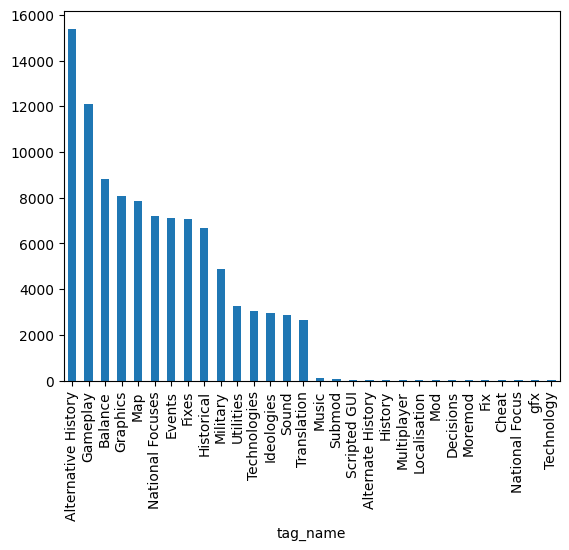

In [17]:
popular_tags = mods_with_tags.groupby("tag_name").size().sort_values(ascending=False).head(30)
# če zgoraj ne vzamem glave 30 zgleda graf čudno
popular_tags.plot(kind="bar")

Pri _Translation_ je tak oster padec, ker so te tag-i tisti, uradni, ki jih steam priporoča, ostale mora ustvarjalec ročno dodati.

<AxesSubplot:title={'center':'Uporaba osnovinh tag-ov'}, ylabel='uses'>

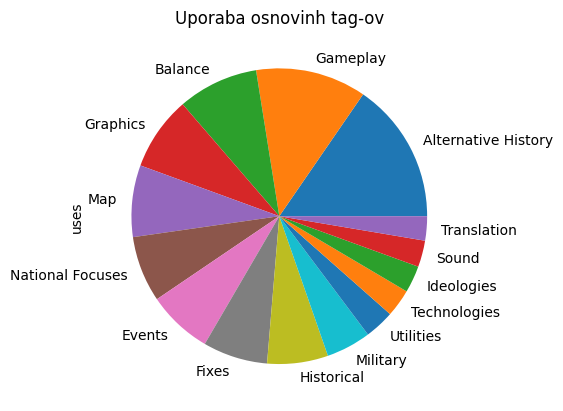

In [18]:
tag_uporaba = (mods_with_tags
               .groupby("tag_name")
               .size()
               .sort_values(ascending=False)
               .head(15)
               .reset_index(name="uses"))
tag_uporaba.plot(kind="pie", labels=tag_uporaba["tag_name"], y="uses", title="Uporaba osnovinh tag-ov", legend=False)

/tmp/ipykernel_3798/86286689.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tag_vsecki = mods_with_tags.groupby("tag_name").sum()[["likes"]].sort_values(ascending=False, by="likes").head(15)


<AxesSubplot:title={'center':'Všečki po popularnih tag-ih'}, ylabel='likes'>

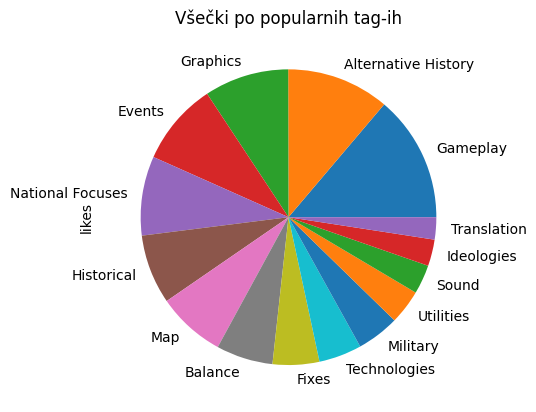

In [19]:
tag_vsecki = mods_with_tags.groupby("tag_name").sum()[["likes"]].sort_values(ascending=False, by="likes").head(15)
tag_vsecki.plot(kind="pie", y="likes", title="Všečki po popularnih tag-ih", legend=False)

In [20]:
tag_nalaganja = (mods_with_tags
                .groupby("tag_name")
                .sum("downloads")[["downloads"]]
                .sort_values(ascending=False, by="downloads")
                .head(15))

<AxesSubplot:xlabel='tag_name'>

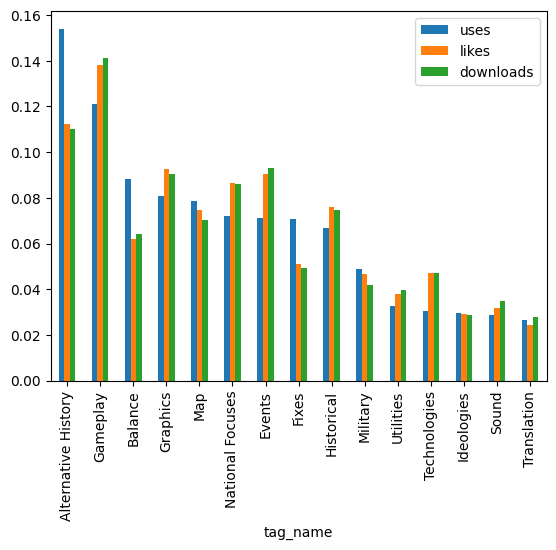

In [21]:
def normiraj(dataframe, aspect):
    out_data = dataframe.copy()
    out_data[aspect] = dataframe[aspect] / dataframe.sum()[aspect]
    return out_data
norm_uporaba = normiraj(tag_uporaba, "uses")
norm_vsecki = normiraj(tag_vsecki, "likes")
norm_nalag = normiraj(tag_nalaganja, "downloads")
use_like_ratio = pd.merge(pd.merge(norm_uporaba, norm_vsecki, on="tag_name"), norm_nalag, on="tag_name")
use_like_ratio.plot(kind="bar", x="tag_name")

Vidimo, da če gledamo popularnost značk glede na všečke ali nalaganja so vrednosti podobne, ogledi se pa malce razlikujejo. Zgleda, da so mod-i o alternativni zgodovini pridobivajo pozornost a niso tako zanimivi, saj imajo mod-i tipa _gameplay_ več všečkov in nalaganj.